# A step-by-step guide to linear regression in R
[Published](https://www.scribbr.com/statistics/linear-regression-in-r/) on February 25, 2020 by Rebecca Bevans. Revised on December 14, 2020. 


Linear regression is a regression model that uses a straight line to describe the relationship between variables. It finds the line of best fit through your data by searching for the value of the regression coefficient(s) that minimizes the total error of the model.

There are two main types of linear regression:

* Simple linear regression uses only one independent variable
* Multiple linear regression uses two or more independent variables

In this step-by-step guide, we will walk you through linear regression in R using two sample datasets.

> #### Simple linear regression
> The first dataset contains observations about income (in a range of \\$15k to \\$75k) and happiness (rated on a scale of 1 to 10) in an imaginary sample of 500 people. The income values are divided by 10,000 to make the income data match the scale of the happiness scores (so a value of \\$2 represents \\$20,000, \\$3 is \\$30,000, etc.)

> #### Multiple linear regression
> The second dataset contains observations on the percentage of people biking to work each day, the percentage of people smoking, and the percentage of people with heart disease in an imaginary sample of 500 towns.

Download the sample datasets to try it yourself.
 


* [Simple Regresion Dataset](https://cdn.scribbr.com/wp-content/uploads//2020/02/income.data_.zip) 
* [Multiple Regression Dataset](https://cdn.scribbr.com/wp-content/uploads//2020/02/heart.data_.zip)

## Table of contents

* [Getting started in R](#start)
* [Load the data into R](#step1)
* [Make sure your data meet the assumptions](#step2)
* [Perform the linear regression analysis](#step3)
* [Check for homoscedasticity](#step4)
* [Visualize the results with a graph](#step5)
* [Report your results](#step6)

### <a name="start"></a> Getting started in R

To install the packages you need for the analysis, run this code (you only need to do this once):

In [1]:
# install.packages("ggplot2")
# install.packages("dplyr")
# install.packages("broom")
# install.packages("ggpubr")

Next, load the packages into your R environment by running this code (you need to do this every time you restart R):

In [2]:
library(ggplot2, lib.loc = '/home/jovyan/opt')
library(dplyr, lib.loc = '/home/jovyan/opt')
library(broom, lib.loc = '/home/jovyan/opt')
library(ggpubr, lib.loc = '/home/jovyan/opt')

library(repr) # Needed to resize inline images


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




<a name="step1"></a> 
## Step 1: Load the data into R

Follow these four steps for each dataset:

**RStudio**
1. Go to File > Import dataset  > From Text (base).
2. Choose the data file you have downloaded (income.data or heart.data), and an Import Dataset window pops up.
3. In the Data Frame window, you should see an X (index) column and columns listing the data for each of the variables (income and happiness or biking, smoking, and heart.disease).
4. Click on the Import button and the file should appear in your Environment tab on the upper right side of the RStudio screen.
**Better**

Better practice is to include in the code a method to read data files such as `read.csv()` or `read_csv()` (rread) as used below. 


In [3]:
income.data = read.csv('./data/income.data.csv')
heart.data = read.csv('./data/heart.data.csv')

After you’ve loaded the data, check that it has been read in correctly using summary().

### Simple regression

Because both our variables are quantitative, when we run this function we see a table in our console with a numeric summary of the data. This tells us the minimum, median, mean, and maximum values of the independent variable (income) and dependent variable (happiness):


In [4]:
summary(income.data)

       X             income        happiness    
 Min.   :  1.0   Min.   :1.506   Min.   :0.266  
 1st Qu.:125.2   1st Qu.:3.006   1st Qu.:2.266  
 Median :249.5   Median :4.424   Median :3.473  
 Mean   :249.5   Mean   :4.467   Mean   :3.393  
 3rd Qu.:373.8   3rd Qu.:5.992   3rd Qu.:4.503  
 Max.   :498.0   Max.   :7.482   Max.   :6.863  

In [5]:
str(income.data)

'data.frame':	498 obs. of  3 variables:
 $ X        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ income   : num  3.86 4.98 4.92 3.21 7.2 ...
 $ happiness: num  2.31 3.43 4.6 2.79 5.6 ...


### Multiple regression

Again, because the variables are [quantitative](https://www.scribbr.com/methodology/types-of-variables/#quantitative-vs-categorical), running the code produces a numeric summary of the data for the independent variables (smoking and biking) and the dependent variable (heart disease):


In [6]:
summary(heart.data)

       X             biking          smoking        heart.disease    
 Min.   :  1.0   Min.   : 1.119   Min.   : 0.5259   Min.   : 0.5519  
 1st Qu.:125.2   1st Qu.:20.205   1st Qu.: 8.2798   1st Qu.: 6.5137  
 Median :249.5   Median :35.824   Median :15.8146   Median :10.3853  
 Mean   :249.5   Mean   :37.788   Mean   :15.4350   Mean   :10.1745  
 3rd Qu.:373.8   3rd Qu.:57.853   3rd Qu.:22.5689   3rd Qu.:13.7240  
 Max.   :498.0   Max.   :74.907   Max.   :29.9467   Max.   :20.4535  

<a name="step2"></a>
## Step 2: Make sure your data meet the assumptions

We can use R to check that our data meet the four main assumptions for linear regression.

### Simple regression

1. **Independence of observations** (aka no autocorrelation)

Because we only have one independent variable and one dependent variable, we don’t need to test for any hidden relationships among variables.

If you know that you have autocorrelation within variables (i.e. multiple observations of the same test subject), then do not proceed with a simple linear regression! Use a structured model, like a linear mixed-effects model, instead.

2. **Normality**

To check whether the dependent variable follows a normal distribution, use the hist() function.

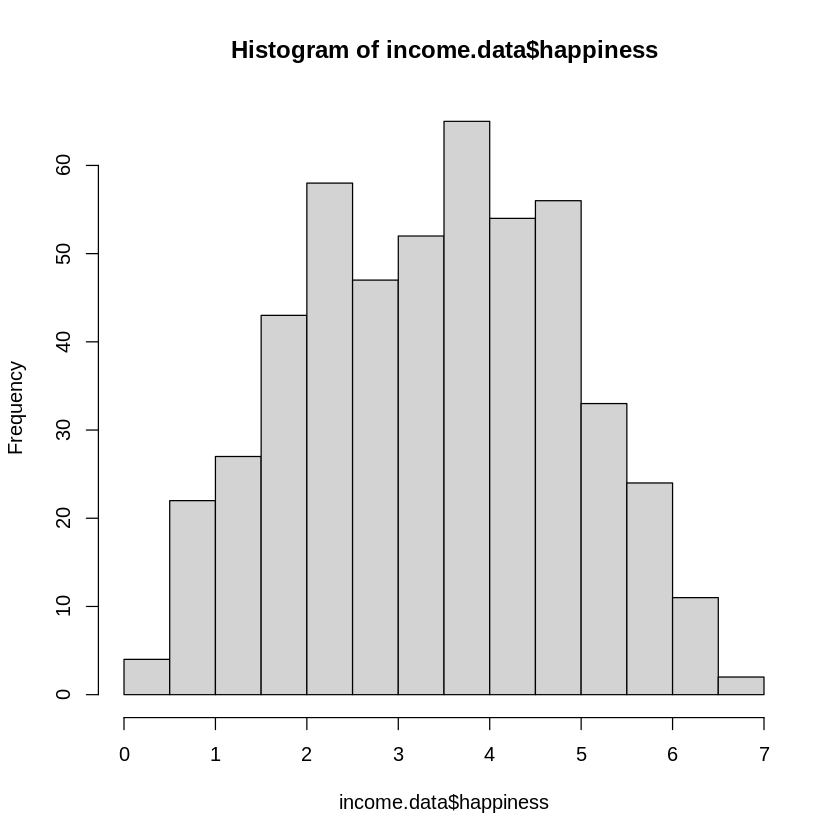

In [7]:
# options(repr.plot.width=10, repr.plot.height=10)
hist(income.data$happiness)

The observations are roughly bell-shaped (more observations in the middle of the distribution, fewer on the tails), so we can proceed with the linear regression.

3. **Linearity**

The relationship between the independent and dependent variable must be linear. We can test this visually with a scatter plot to see if the distribution of data points could be described with a straight line.

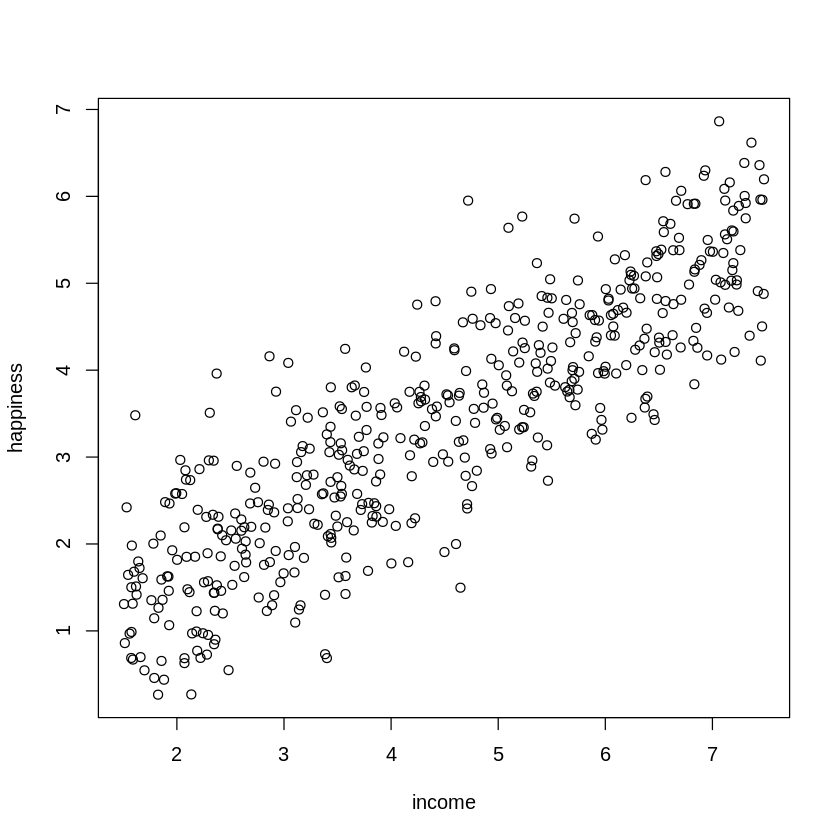

In [8]:
plot(happiness ~ income, data = income.data)

The relationship looks roughly linear, so we can proceed with the linear model.

4. Homoscedasticity (aka homogeneity of variance)

This means that the prediction error doesn’t change significantly over the range of prediction of the model. We can test this assumption later, after fitting the linear model.

### Multiple regression

1. **Independence of observations** (aka no autocorrelation)

Use the cor() function to test the relationship between your independent variables and make sure they aren’t too highly correlated.

In [9]:
cor(heart.data$biking, heart.data$smoking)

[1] 0.01513618

When we run this code, the output is 0.015. The correlation between biking and smoking is small (0.015 is only a 1.5% correlation), so we can include both parameters in our model.

2. **Normality**

Use the hist() function to test whether your dependent variable follows a normal distribution.

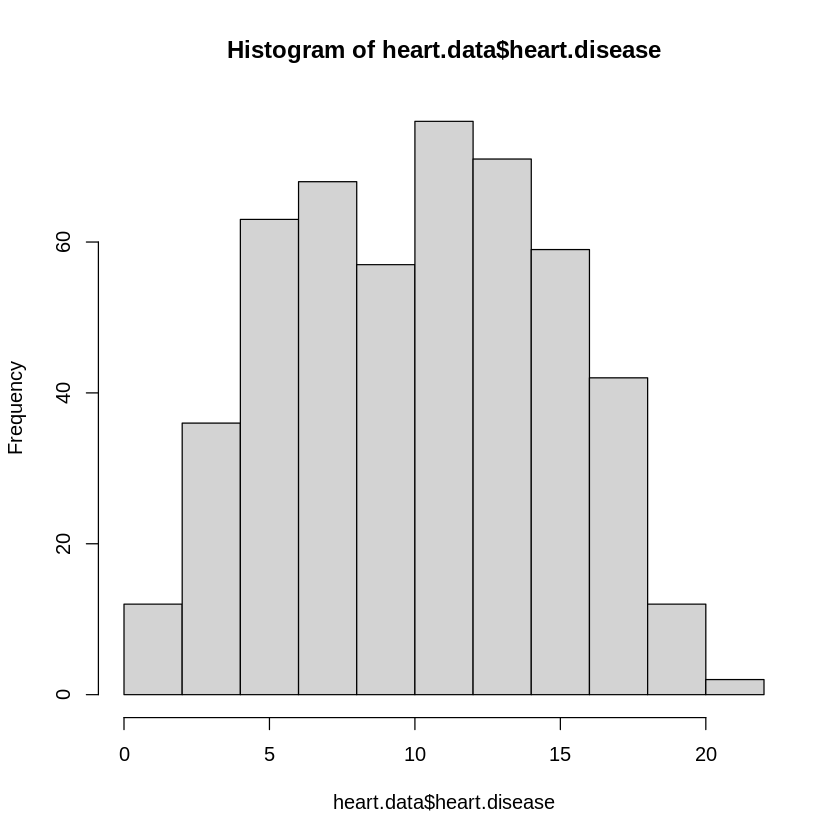

In [10]:
hist(heart.data$heart.disease)

The distribution of observations is roughly bell-shaped, so we can proceed with the linear regression.

3. **Linearity**

We can check this using two scatterplots: one for biking and heart disease, and one for smoking and heart disease.

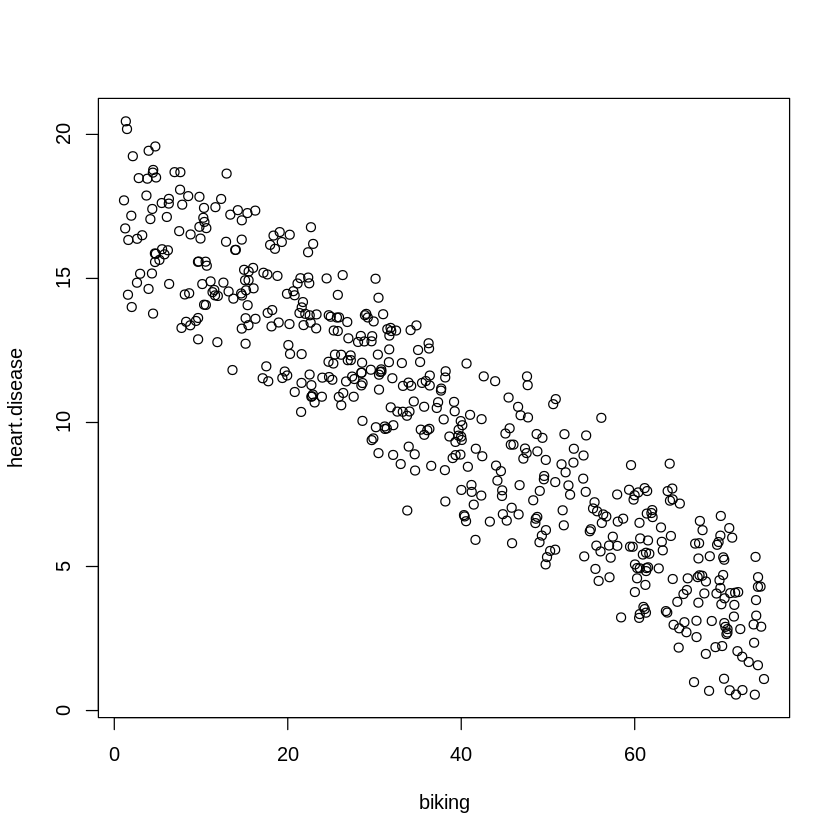

In [11]:
plot(heart.disease ~ biking, data=heart.data)

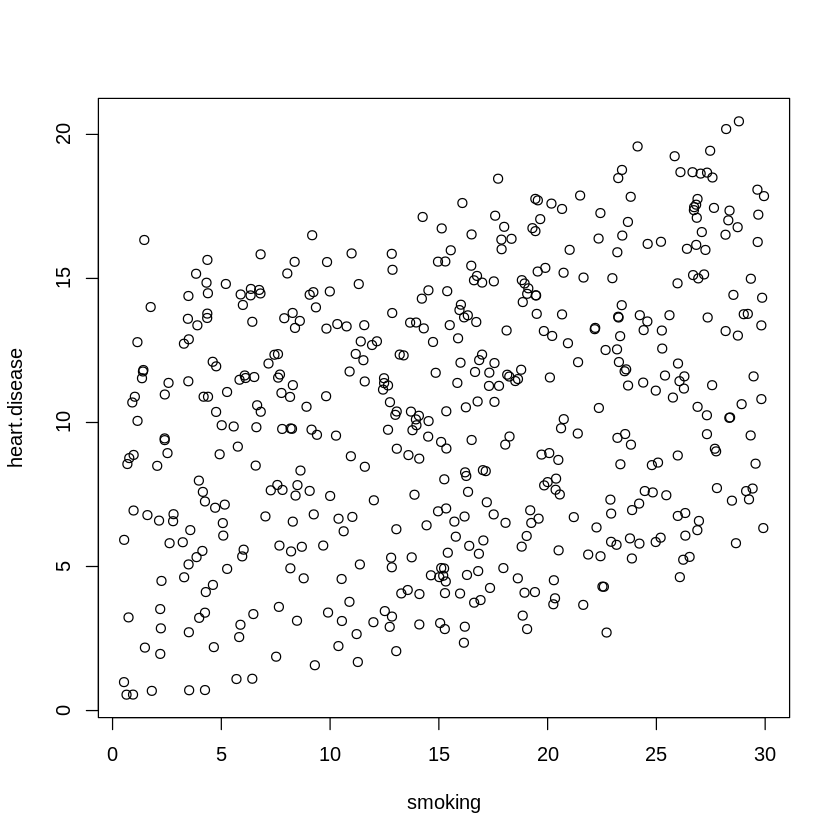

In [12]:
plot(heart.disease ~ smoking, data=heart.data)

Although the relationship between smoking and heart disease is a bit less clear, it still appears linear. We can proceed with linear regression.

4. **Homoscedasticity**

We will check this after we make the model.

<a name="step3"></a>
### Step 3: Perform the linear regression analysis

Now that you’ve determined your data meet the assumptions, you can perform a linear regression analysis to evaluate the relationship between the independent and dependent variables.

#### Simple regression: income and happiness

Let’s see if there’s a linear relationship between income and happiness in our survey of 500 people with incomes ranging from $15k to $75k, where happiness is measured on a scale of 1 to 10.

To perform a simple linear regression analysis and check the results, you need to run two lines of code. The first line of code makes the linear model, and the second line prints out the summary of the model:

In [13]:
income.happiness.lm <- lm(happiness ~ income, data = income.data)

summary(income.happiness.lm)


Call:
lm(formula = happiness ~ income, data = income.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02479 -0.48526  0.04078  0.45898  2.37805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.20427    0.08884   2.299   0.0219 *  
income       0.71383    0.01854  38.505   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7181 on 496 degrees of freedom
Multiple R-squared:  0.7493,	Adjusted R-squared:  0.7488 
F-statistic:  1483 on 1 and 496 DF,  p-value: < 2.2e-16


This output table first presents the model equation, then summarizes the model residuals (see step 4).

The **Coefficients** section shows:

1. The estimates (Estimate) for the model parameters – the value of the y-intercept (in this case 0.204) and the estimated effect of income on happiness (0.713).
2. The [standard error](https://www.scribbr.com/statistics/standard-error/) of the estimated values(**Std. Error**).
3. The [test statistic](https://www.scribbr.com/statistics/test-statistic/) (t value, in this case the [t-statistic](t-stati)).
4. The [p-value](https://www.scribbr.com/statistics/p-value/) ( Pr(>| t | ) ), aka the probability of finding the given t-statistic if the null hypothesis of no relationship were true.

The final three lines are model diagnostics – the most important thing to note is the **p-value** (here it is 2.2e-16, or almost zero), which will indicate whether the model fits the data well.

From these results, we can say that there is a **significant positive relationship** between income and happiness (p-value < 0.001), with a 0.713-unit (+/- 0.01) increase in happiness for every unit increase in income.

### Multiple regression: biking, smoking, and heart disease

Let’s see if there’s a linear relationship between biking to work, smoking, and heart disease in our imaginary survey of 500 towns. The rates of biking to work range between 1 and 75%, rates of smoking between 0.5 and 30%, and rates of heart disease between 0.5% and 20.5%.

To test the relationship, we first fit a linear model with heart disease as the dependent variable and biking and smoking as the independent variables. Run these two lines of code:

In [14]:
heart.disease.lm<-lm(heart.disease ~ biking + smoking, data = heart.data)

summary(heart.disease.lm)


Call:
lm(formula = heart.disease ~ biking + smoking, data = heart.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1789 -0.4463  0.0362  0.4422  1.9331 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.984658   0.080137  186.99   <2e-16 ***
biking      -0.200133   0.001366 -146.53   <2e-16 ***
smoking      0.178334   0.003539   50.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.654 on 495 degrees of freedom
Multiple R-squared:  0.9796,	Adjusted R-squared:  0.9795 
F-statistic: 1.19e+04 on 2 and 495 DF,  p-value: < 2.2e-16


The estimated effect of biking on heart disease is -0.2, while the estimated effect of smoking is 0.178.

This means that for every 1% increase in biking to work, there is a correlated 0.2% decrease in the incidence of heart disease. Meanwhile, for every 1% increase in smoking, there is a 0.178% increase in the rate of heart disease.

The standard errors for these regression coefficients are very small, and the t-statistics are very large (-147 and 50.4, respectively). The p-values reflect these small errors and large t-statistics. For both parameters, there is almost zero probability that this effect is due to chance.

Remember that these data are made up for this example, so in real life these relationships would not be nearly so clear!

<a name="step4"></a>
### Step 4: Check for homoscedasticity

Before proceeding with data visualization, we should make sure that our models fit the homoscedasticity assumption of the linear model.

#### Simple regression

We can run `plot(income.happiness.lm)` to check whether the observed data meets our model assumptions:

Note that the `par(mfrow())` command will divide the Plots window into the number of rows and columns specified in the brackets. So `par(mfrow=c(2,2))` divides it up into two rows and two columns. To go back to plotting one graph in the entire window, set the parameters again and replace the (2,2) with (1,1).

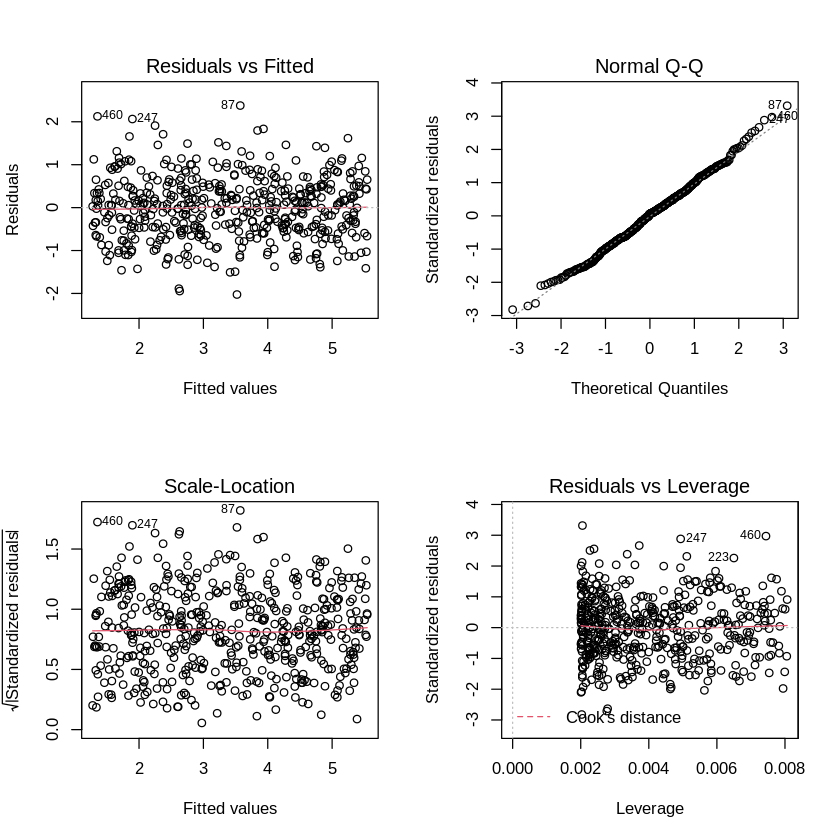

In [15]:
par(mfrow=c(2,2))
plot(income.happiness.lm)
par(mfrow=c(1,1))

Residuals are the unexplained [variance](https://www.scribbr.com/statistics/variance/). They are not exactly the same as model error, but they are calculated from it, so seeing a bias in the residuals would also indicate a bias in the error.

The most important thing to look for is that the red lines representing the mean of the residuals are all basically horizontal and centered around zero. This means there are no outliers or biases in the data that would make a linear regression invalid.

In the **Normal Q-Qplot** in the top right, we can see that the real residuals from our model form an almost perfectly one-to-one line with the theoretical residuals from a perfect model.

Based on these residuals, we can say that our model meets the assumption of homoscedasticity.

#### Multiple regression

Again, we should check that our model is actually a good fit for the data, and that we don’t have large variation in the model error, by running this code:

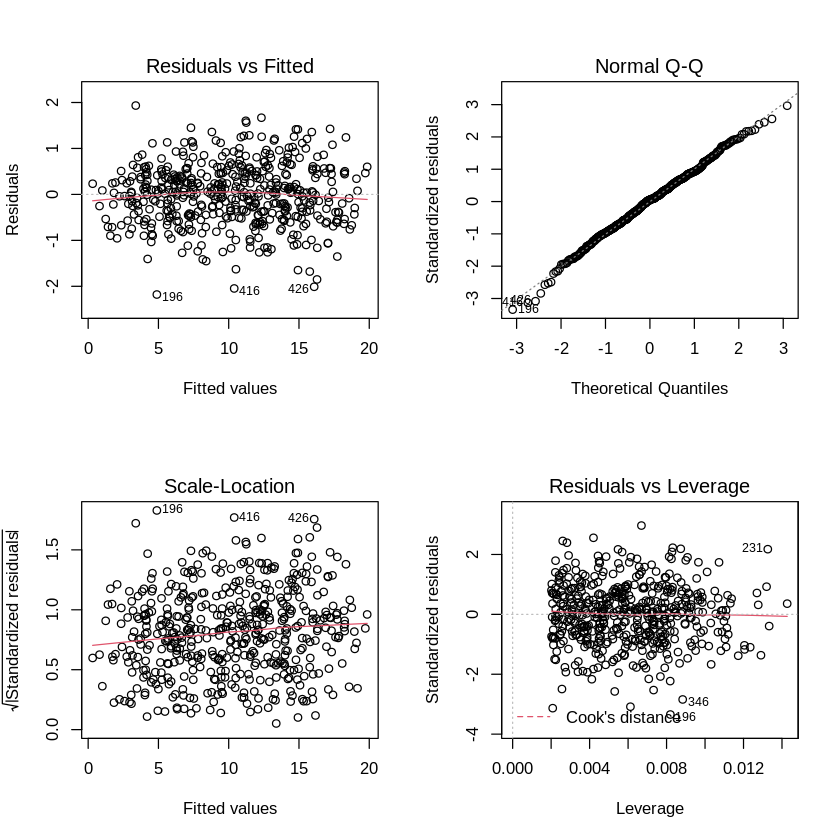

In [16]:
par(mfrow=c(2,2))
plot(heart.disease.lm)
par(mfrow=c(1,1))

As with our simple regression, the residuals show no bias, so we can say our model fits the assumption of homoscedasticity.

<a name="step5"></a>
## Step 5: Visualize the results with a graph

Next, we can plot the data and the regression line from our linear regression model so that the results can be shared.

### Simple regression

Follow 4 steps to visualize the results of your simple linear regression.

1. **Plot the data points on a graph**

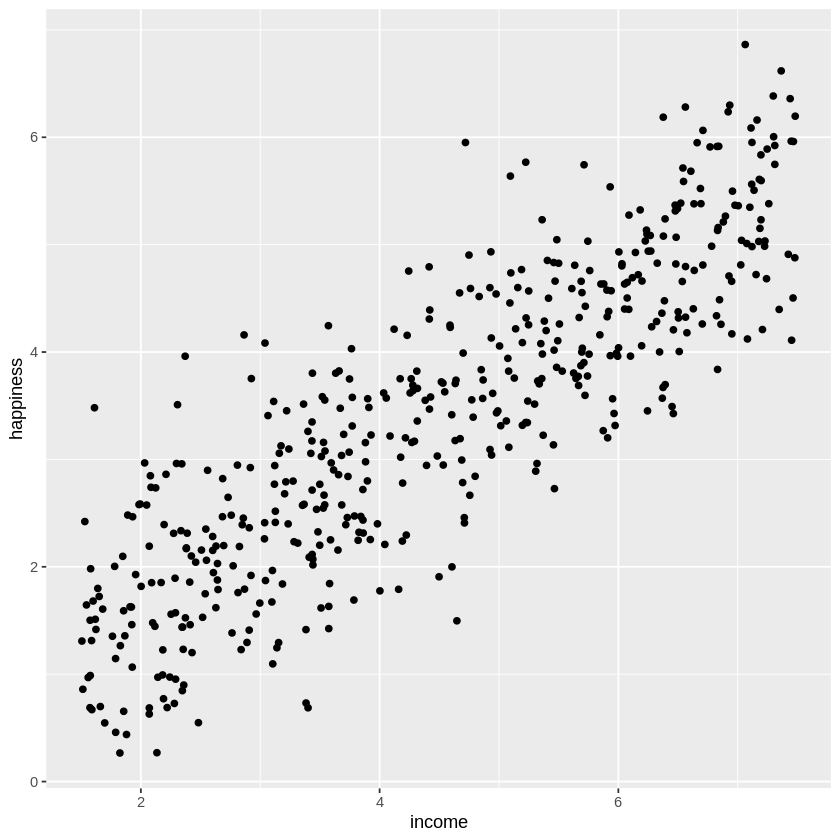

In [17]:
income.graph<-ggplot(income.data, aes(x=income, y=happiness))+
                     geom_point()
income.graph

2. **Add the linear regression line to the plotted data**

Add the regression line using geom_smooth() and typing in lm as your method for creating the line. This will add the line of the linear regression as well as the standard error of the estimate (in this case +/- 0.01) as a light grey stripe surrounding the line:

`geom_smooth()` using formula 'y ~ x'



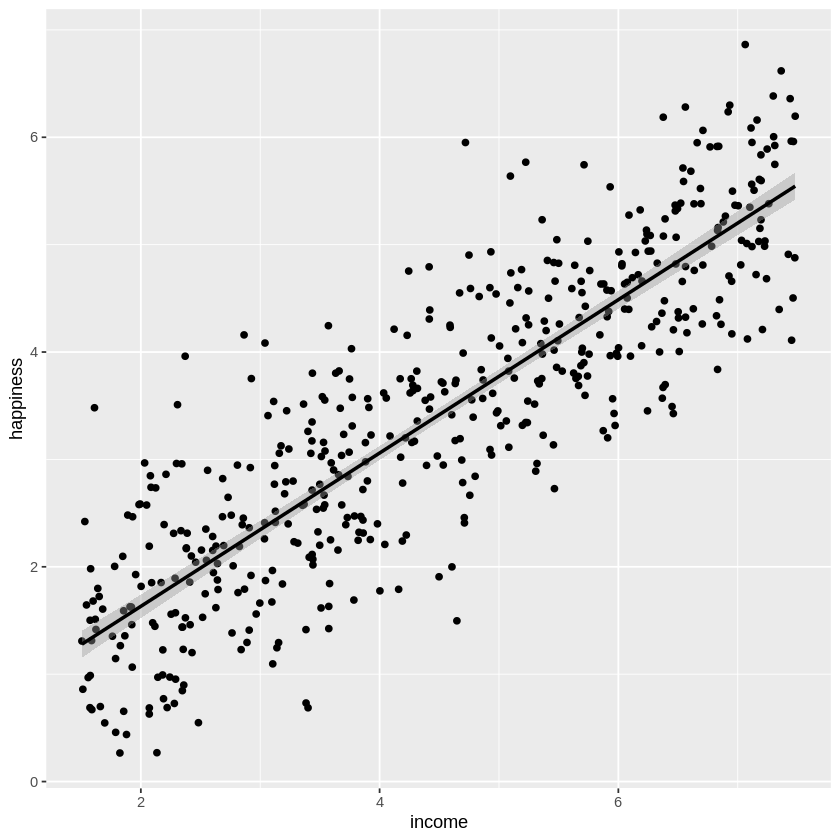

In [18]:
income.graph <- income.graph + geom_smooth(method="lm", col="black")

income.graph

3. **Add the equation for the regression line.**

`geom_smooth()` using formula 'y ~ x'



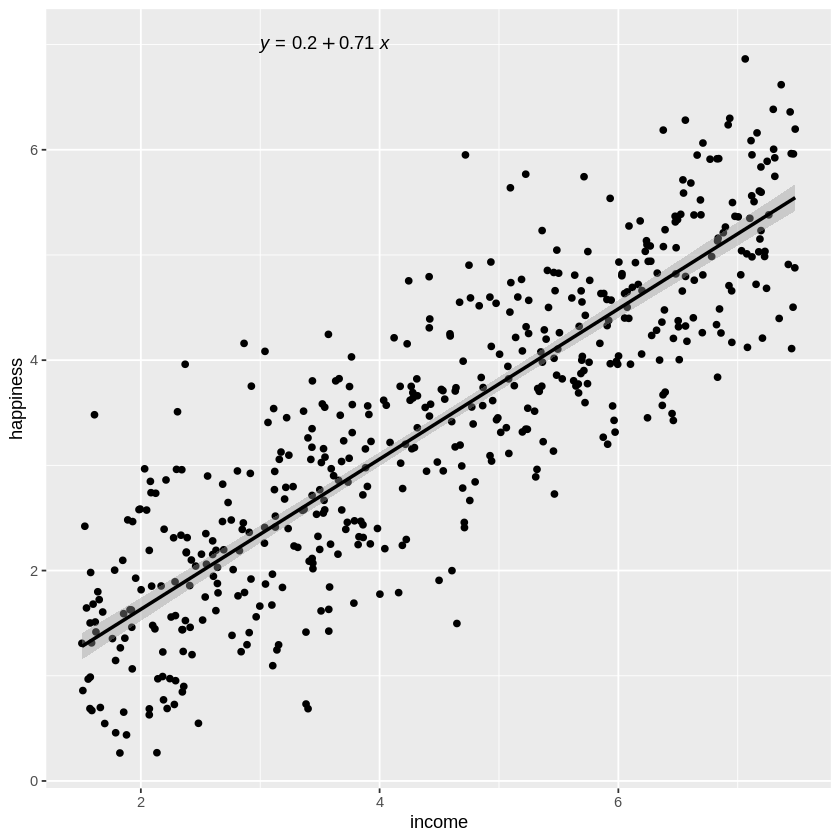

In [19]:
income.graph <- income.graph + 
                stat_regline_equation(label.x = 3, label.y = 7)

income.graph

4. **Make the graph ready for publication**

We can add some style parameters using `theme_bw()` and making custom labels using `labs()`.

This produces the finished graph that you can include in your papers:

`geom_smooth()` using formula 'y ~ x'



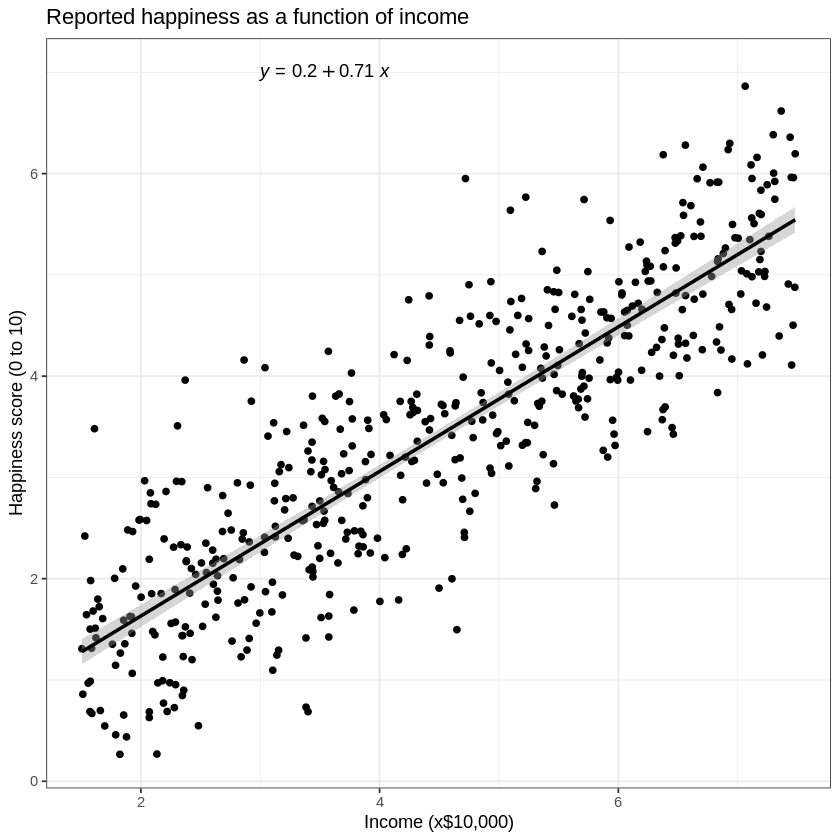

In [20]:
income.graph +
  theme_bw() +
  labs(title = "Reported happiness as a function of income",
      x = "Income (x$10,000)",
      y = "Happiness score (0 to 10)")

### Multiple regression

The visualization step for multiple regression is more difficult than for simple regression, because we now have two predictors. One option is to plot a plane, but these are difficult to read and not often published.

We will try a different method: plotting the relationship between biking and heart disease at different levels of smoking. In this example, smoking will be treated as a factor with three levels, just for the purposes of displaying the relationships in our data.

There are 7 steps to follow.

1. **Create a new dataframe with the information needed to plot the model**

Use the function `expand.grid()` to create a dataframe with the parameters you supply. Within this function we will:

* Create a sequence from the lowest to the highest value of your observed biking data;
* Choose the minimum, mean, and maximum values of smoking, in order to make 3 levels of smoking over which to predict rates of heart disease.

In [21]:
plotting.data<-expand.grid(
  biking = seq(min(heart.data$biking), max(heart.data$biking), length.out=30),
    smoking=c(min(heart.data$smoking), mean(heart.data$smoking), max(heart.data$smoking)))

This will not create anything new in your console, but you should see a new data frame appear in the Environment tab. Click on it to view it.

2. **Predict the values of heart disease based on your linear model**

Next we will save our ‘predicted y’ values as a new column in the dataset we just created.

In [22]:
plotting.data$predicted.y <- predict.lm(heart.disease.lm, newdata=plotting.data)

3. **Round the smoking numbers to two decimals**

This will make the legend easier to read later on.

In [23]:
plotting.data$smoking <- round(plotting.data$smoking, digits = 2)

4. **Change the ‘smoking’ variable into a factor**

This allows us to plot the interaction between biking and heart disease at each of the three levels of smoking we chose.

In [24]:
plotting.data$smoking <- as.factor(plotting.data$smoking)

5. **Plot the original data**

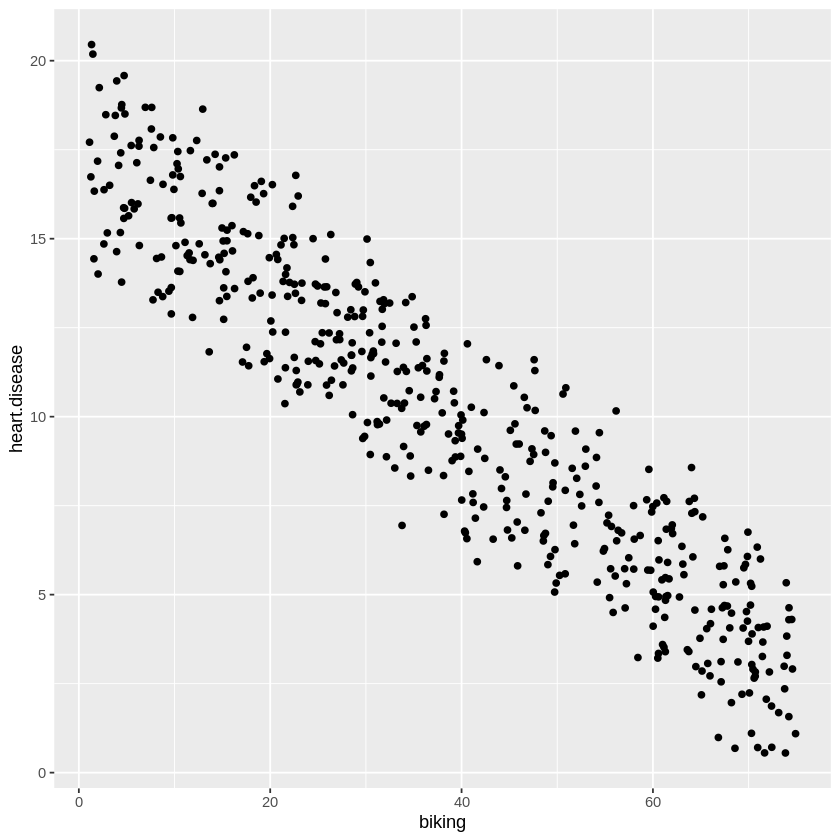

In [25]:
heart.plot <- ggplot(heart.data, aes(x=biking, y=heart.disease)) +
  geom_point()

heart.plot

6. **Add the regression lines**

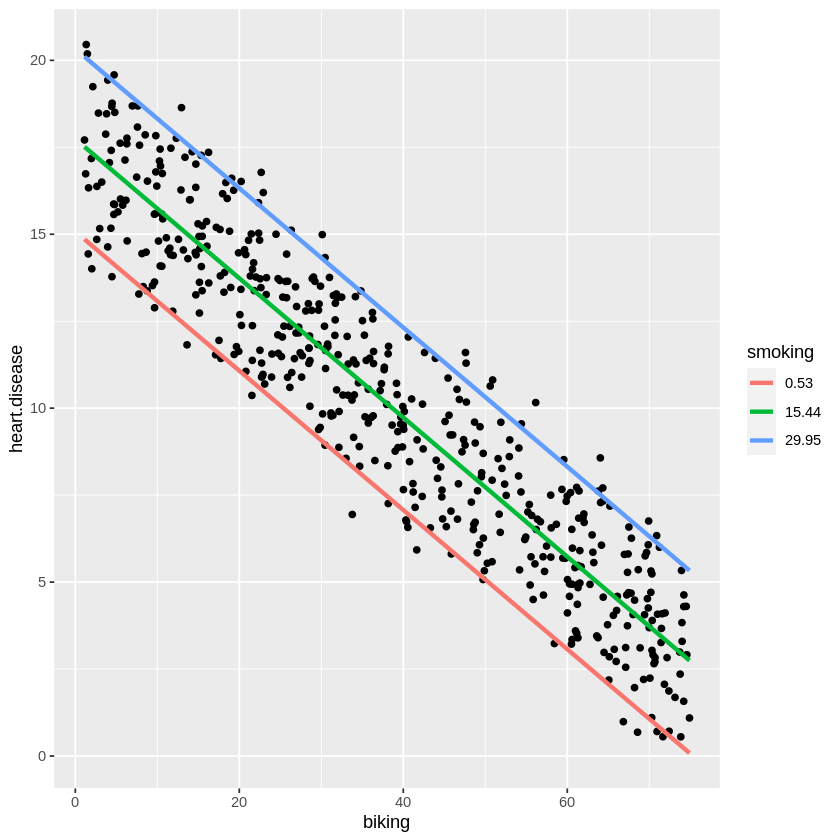

In [26]:
heart.plot <- heart.plot +
  geom_line(data=plotting.data, aes(x=biking, y=predicted.y, color=smoking), size=1.25)

heart.plot

7. **Make the graph ready for publication**

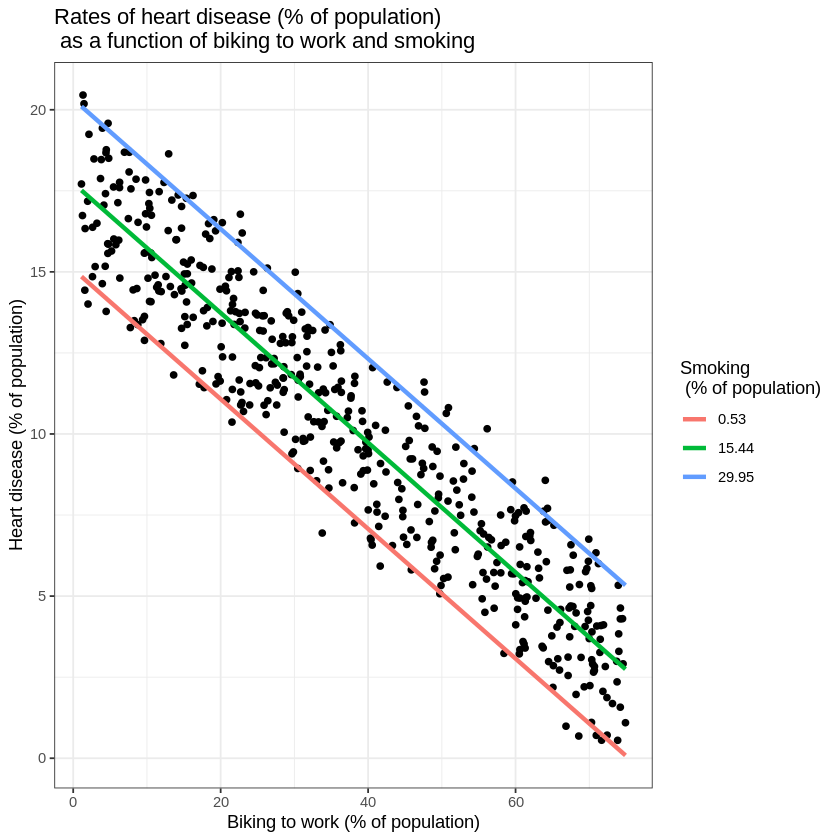

In [27]:
heart.plot <-
heart.plot +
  theme_bw() +
  labs(title = "Rates of heart disease (% of population) \n as a function of biking to work and smoking",
      x = "Biking to work (% of population)",
      y = "Heart disease (% of population)",
      color = "Smoking \n (% of population)")

heart.plot

Because this graph has two regression coefficients, the stat_regline_equation() function won’t work here. But if we want to add our regression model to the graph, we can do so like this:

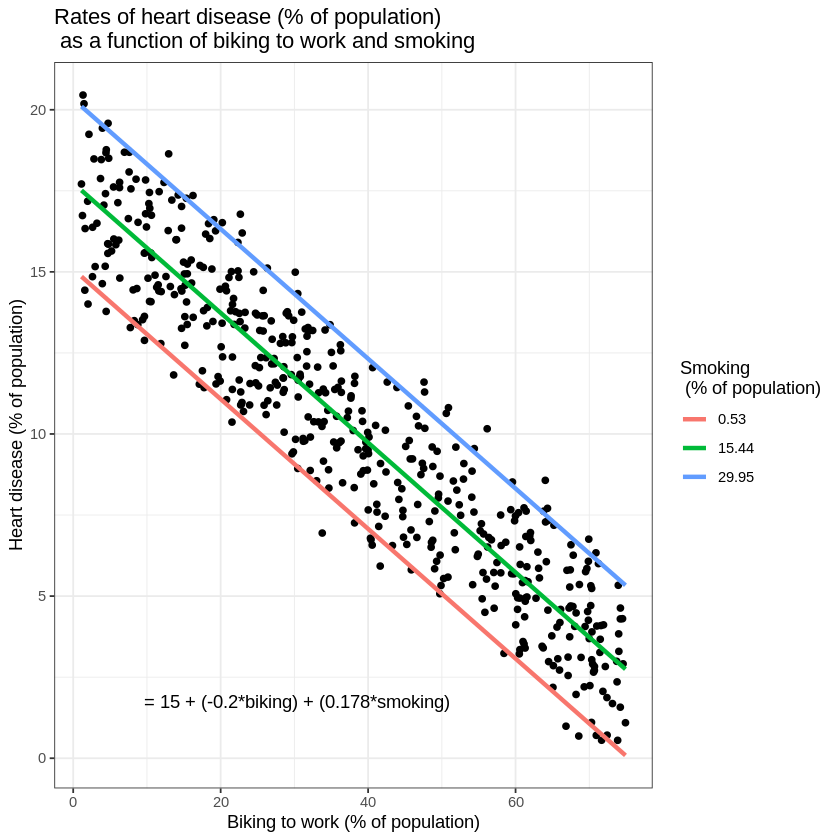

In [28]:
heart.plot + annotate(geom="text", x=30, y=1.75, label=" = 15 + (-0.2*biking) + (0.178*smoking)")

This is the finished graph that you can include in your papers!

<a name="step6"></a>
### Step 6: Report your results

In addition to the graph, include a brief statement explaining the results of the regression model.

> *Reporting the results of simple linear regression*
>
>We found a significant relationship between income and happiness (p < 0.001, R2 = 0.73 ± 0.0193), >with a 0.73-unit increase in reported happiness for every $10,000 increase in income.


> *Reporting the results of multiple linear regression*
>
> In our survey of 500 towns, we found significant relationships between the frequency of biking to work and the frequency of heart disease and the frequency of smoking and frequency of heart disease (p < 0 and p<0.001, respectively).
>
>Specifically we found a 0.2% decrease (± 0.0014) in the frequency of heart disease for every 1% increase in biking, and a 0.178% increase (± 0.0035) in the frequency of heart disease for every 1% increase in smoking.